# Linear Classifier in Tensorflow from Scratch

### Starting with some nicely linearly separable synthetic data to work with. 

**Data** : two classes of points in a 2D plane. <br>

We’ll generate each class of points by drawing their coordinates from a random distribution with a specific covariance matrix and a specific mean. <br>
Intuitively, the covariance matrix describes the shape of the point cloud, and the mean describes its position in the plane. <br>
We’ll reuse the same covariance matrix for both point clouds, but we’ll use two different mean values—the point clouds will have the same shape, but different positions.<br>


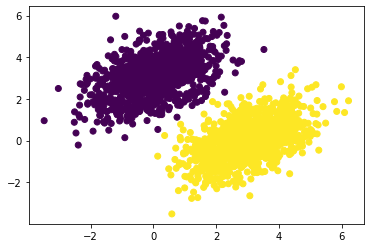

In [7]:
import numpy as np
num_samples_per_class = 1000

# Generate the first class of points: 1000 random 2D points. 
# cov=[[1, 0.5],[0.5, 1]] corresponds to an oval-like point cloud 
# oriented from bottom left to top right.
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
    )
# Generate the other class of points with a different mean and the same covariance matrix.
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
    )

# Stacking the differn tdata into a single array 

inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

# generate the corresponding target labels, 
# an array of zeros and ones of shape (2000, 1), 
# where targets[i, 0] is 0 if inputs[i] belongs to class 0 (and inversely).

targets = np.vstack(
    (
        np.zeros((num_samples_per_class,1),dtype='float32'),
        np.ones((num_samples_per_class,1),dtype="float32")
    )
    
)

# Plotting the generated data 

import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

### Creating Linear Classifier to separate these two blobs 

A linear classifier is an affine transformation (prediction=W•input+b) trained to minimize the square of the difference between predictions and the targets.